In [72]:
# Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df = pd.read_excel('data/nov_2020_rejects.xlsx')

In [3]:
df.head(50)

,Unnamed: 0,DLCOUNTYCODE,JURISDCODE,COUNTY,JURISDICTION,BALLOTS ISSUED,BALLOTS TABULATED,NO SIGNATURE,SIGNATURE NO MATCH,BALLOT LATE,VOTER SENTENCED,VOTER MOVED,VOTER CANCELLED,VOTER REJECTED,VOTER DECEASED,VOTED AT POLLS,NO BALLOT IN ENVELOPE,ID NOT CONFIRMED,TOTAL BALLOTS REJECTED
0,1.0,1.0,1040.0,ALCONA COUNTY,ALCONA TOWNSHIP,460,427,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,2.0,1.0,12460.0,ALCONA COUNTY,CALEDONIA TOWNSHIP,369,330,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,3.0,1.0,19320.0,ALCONA COUNTY,CURTIS TOWNSHIP,389,338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
3,4.0,1.0,34820.0,ALCONA COUNTY,GREENBUSH TOWNSHIP,437,395,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,4
4,5.0,1.0,35740.0,ALCONA COUNTY,GUSTIN TOWNSHIP,178,167,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
5,6.0,1.0,36860.0,ALCONA COUNTY,HARRISVILLE CITY,135,125,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
6,7.0,1.0,36880.0,ALCONA COUNTY,HARRISVILLE TOWNSHIP,349,324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7,8.0,1.0,37220.0,ALCONA COUNTY,HAWES TOWNSHIP,298,268,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2
8,9.0,1.0,37380.0,ALCONA COUNTY,HAYNES TOWNSHIP,274,253,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9,10.0,1.0,53880.0,ALCONA COUNTY,MIKADO TOWNSHIP,182,162,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [4]:
df.shape

(1521, 19)

In [5]:
list(df.columns)

['Unnamed: 0',
 'DLCOUNTYCODE',
 'JURISDCODE',
 'COUNTY',
 'JURISDICTION',
 'BALLOTS ISSUED',
 'BALLOTS TABULATED',
 'NO SIGNATURE',
 'SIGNATURE NO MATCH',
 'BALLOT LATE',
 'VOTER SENTENCED',
 'VOTER MOVED',
 'VOTER CANCELLED',
 'VOTER REJECTED',
 'VOTER DECEASED',
 'VOTED AT POLLS',
 'NO BALLOT IN ENVELOPE',
 'ID NOT CONFIRMED',
 'TOTAL BALLOTS REJECTED']

In [6]:
jurisdictions = pd.read_excel('data/focus jurisdictions.xlsx')

In [7]:
list(jurisdictions.columns)

['jurisdiction ']

In [8]:
jurisdictions.shape

(54, 1)

In [9]:
jurisdictions.isna().sum()

jurisdiction     0
dtype: int64

In [10]:
new_juris = jurisdictions['jurisdiction '].str.split("(", n=1, expand=True)

In [11]:
new_juris = new_juris.rename({0: "jurisdiction"}, axis='columns')

In [12]:
focus_jurisdictions = new_juris[['jurisdiction']]

In [13]:
#Make a series with focus jurisdictions in all caps 
focus_jurisdictions = focus_jurisdictions['jurisdiction'].str.upper().str.rstrip()

In [14]:
focus_jurisdictions = focus_jurisdictions.to_list()

In [15]:
focus_jurisdictions

['ALBION CITY',
 'ALLENDALE TOWNSHIP',
 'ANN ARBOR CITY',
 'BATTLE CREEK CITY',
 'BAY CITY CITY',
 'BENTON CHARTER TOWNSHIP',
 'BENTON HARBOR CITY',
 'BUENA VISTA CHARTER TOWNSHIP',
 'CANTON TOWNSHIP',
 'CENTER LINE CITY',
 'CLINTON TOWNSHIP',
 'CLYDE TOWNSHIP',
 'COVERT TOWNSHIP',
 'DEARBORN CITY',
 'DEARBORN HEIGHTS CITY',
 'DETROIT CITY',
 'EASTPOINTE CITY',
 'EAST LANSING CITY',
 'ECORSE CITY',
 'FENNVILLE',
 'FLINT CITY',
 'FLINT TOWNSHIP',
 'GRAND RAPIDS CITY',
 'HAMTRAMCK CITY',
 'HARPER WOODS CITY',
 'HARRIS TOWNSHIP',
 'HIGHLAND PARK CITY',
 'HOLLAND CITY',
 'HOLLAND TOWNSHIP',
 'INKSTER',
 'KALAMAZOO CITY',
 'KENTWOOD CITY',
 'LANSING CITY',
 'LIVONIA',
 'MARQUETTE CITY',
 'MOUNT PLEASANT CITY',
 'MUSKEGON CITY',
 'MUSKEGON HEIGHTS CITY',
 'NOVI CITY',
 'OAK PARK CITY',
 'PONTIAC CITY',
 'PORT HURON CITY',
 'REDFORD TOWNSHIP',
 'RIVER ROUGE CITY',
 'ROYAL OAK TOWNSHIP',
 'SAGINAW CITY',
 'ST. CLAIR SHORES CITY',
 'STERLING HEIGHTS CITY',
 'SOUTHFIELD CITY',
 'TROY CITY',
 'WA

In [16]:
focused_df = df[df['JURISDICTION'].isin(focus_jurisdictions)]

In [17]:
focused_df.shape

(54, 19)

In [50]:
df2 = focused_df.drop(columns=['Unnamed: 0','DLCOUNTYCODE', 'JURISDCODE'], axis=1).reset_index(drop=True)

In [51]:
df2

,COUNTY,JURISDICTION,BALLOTS ISSUED,BALLOTS TABULATED,NO SIGNATURE,SIGNATURE NO MATCH,BALLOT LATE,VOTER SENTENCED,VOTER MOVED,VOTER CANCELLED,VOTER REJECTED,VOTER DECEASED,VOTED AT POLLS,NO BALLOT IN ENVELOPE,ID NOT CONFIRMED,TOTAL BALLOTS REJECTED
0,ALLEGAN COUNTY,CLYDE TOWNSHIP,404,340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
1,BAY COUNTY,BAY CITY CITY,9412,8760,1.0,15.0,3.0,0.0,18.0,6.0,0.0,4.0,97.0,0.0,0.0,144
2,BERRIEN COUNTY,BENTON CHARTER TOWNSHIP,4457,4160,2.0,0.0,0.0,0.0,13.0,0.0,0.0,1.0,0.0,0.0,0.0,16
3,BERRIEN COUNTY,BENTON HARBOR CITY,2461,2153,4.0,3.0,2.0,0.0,11.0,0.0,0.0,1.0,60.0,1.0,0.0,82
4,CALHOUN COUNTY,ALBION CITY,1793,1618,0.0,2.0,1.0,0.0,8.0,0.0,0.0,3.0,0.0,0.0,0.0,14
5,CALHOUN COUNTY,BATTLE CREEK CITY,13636,12310,0.0,18.0,10.0,0.0,41.0,1.0,0.0,15.0,0.0,0.0,0.0,85
6,GENESEE COUNTY,FLINT CITY,22860,19821,40.0,25.0,36.0,0.0,56.0,0.0,0.0,24.0,1.0,0.0,0.0,182
7,GENESEE COUNTY,FLINT TOWNSHIP,11484,10417,18.0,0.0,8.0,0.0,51.0,4.0,0.0,15.0,0.0,5.0,0.0,101
8,INGHAM COUNTY,EAST LANSING CITY,12696,11587,4.0,1.0,31.0,0.0,189.0,2.0,0.0,7.0,0.0,0.0,0.0,234
9,INGHAM COUNTY,LANSING CITY,40151,36398,27.0,3.0,53.0,0.0,203.0,2.0,0.0,33.0,460.0,0.0,21.0,802


In [52]:
df2['OTHER'] = df2['VOTER MOVED'] + df2['VOTER DECEASED'] + df2['VOTED AT POLLS'] + df2['VOTER SENTENCED'] + df2['VOTER CANCELLED'] + df2['VOTER REJECTED']

In [74]:
df2['SIGNATURE ISSUES'] = df2['NO SIGNATURE'] + df2['SIGNATURE NO MATCH']

In [75]:
df2['REJECTED RATE'] = df2['TOTAL BALLOTS REJECTED']/df2['BALLOTS TABULATED']

In [76]:
df2['NO SIG RATE'] = df2['NO SIGNATURE']/df2['TOTAL BALLOTS REJECTED']

In [77]:
df2['ID NOT CONF RATE'] = df2['ID NOT CONFIRMED']/df2['TOTAL BALLOTS REJECTED']

In [78]:
df2['NO MATCH RATE'] = df2['SIGNATURE NO MATCH']/df2['TOTAL BALLOTS REJECTED']

In [79]:
df2['BALLOT LATE RATE'] = df2['BALLOT LATE']/df2['TOTAL BALLOTS REJECTED']

In [80]:
df2['ENV EMPTY RATE'] = df2['NO BALLOT IN ENVELOPE']/df2['TOTAL BALLOTS REJECTED']

In [81]:
sorted = df2.sort_values('TOTAL BALLOTS REJECTED', ascending = False)

In [82]:
clipped = sorted.loc[sorted['TOTAL BALLOTS REJECTED'] > 300]

In [83]:
clipped.shape

(14, 24)

In [84]:
clipped

,COUNTY,JURISDICTION,BALLOTS ISSUED,BALLOTS TABULATED,NO SIGNATURE,SIGNATURE NO MATCH,BALLOT LATE,VOTER SENTENCED,VOTER MOVED,VOTER CANCELLED,...,ID NOT CONFIRMED,TOTAL BALLOTS REJECTED,OTHER,REJECTED RATE,NO SIG RATE,ID NOT CONF RATE,NO MATCH RATE,BALLOT LATE RATE,ENV EMPTY RATE,SIGNATURE ISSUES
47,WAYNE COUNTY,DETROIT CITY,202230,174485,627.0,54.0,291.0,0.0,789.0,1.0,...,2.0,2507,1523.0,0.014368,0.250100,0.000798,0.021540,0.116075,0.003989,681.0
12,KENT COUNTY,GRAND RAPIDS CITY,65723,59188,15.0,0.0,49.0,0.0,425.0,17.0,...,0.0,2217,2153.0,0.037457,0.006766,0.000000,0.000000,0.022102,0.000000,15.0
19,MACOMB COUNTY,STERLING HEIGHTS CITY,44480,40664,55.0,125.0,79.0,0.0,149.0,3.0,...,0.0,1876,1606.0,0.046134,0.029318,0.000000,0.066631,0.042111,0.005864,180.0
41,WASHTENAW COUNTY,ANN ARBOR CITY,60541,56277,11.0,3.0,143.0,1.0,419.0,25.0,...,0.0,1583,1425.0,0.028129,0.006949,0.000000,0.001895,0.090335,0.000632,14.0
20,MACOMB COUNTY,WARREN CITY,42385,38412,55.0,58.0,45.0,0.0,133.0,6.0,...,0.0,1255,1096.0,0.032672,0.043825,0.000000,0.046215,0.035857,0.000797,113.0
11,KALAMAZOO COUNTY,KALAMAZOO CITY,23631,21236,18.0,8.0,27.0,0.0,169.0,29.0,...,0.0,839,786.0,0.039508,0.021454,0.000000,0.009535,0.032181,0.000000,26.0
9,INGHAM COUNTY,LANSING CITY,40151,36398,27.0,3.0,53.0,0.0,203.0,2.0,...,21.0,802,698.0,0.022034,0.033666,0.026185,0.003741,0.066085,0.000000,30.0
26,OAKLAND COUNTY,NOVI CITY,27737,25944,14.0,19.0,35.0,0.0,117.0,11.0,...,0.0,660,592.0,0.025439,0.021212,0.000000,0.028788,0.053030,0.000000,33.0
46,WAYNE COUNTY,DEARBORN HEIGHTS CITY,16731,14931,22.0,11.0,26.0,0.0,81.0,3.0,...,0.0,488,429.0,0.032684,0.045082,0.000000,0.022541,0.053279,0.000000,33.0
13,KENT COUNTY,KENTWOOD CITY,18626,17058,19.0,21.0,19.0,0.0,66.0,0.0,...,5.0,457,392.0,0.026791,0.041575,0.010941,0.045952,0.041575,0.002188,40.0


In [85]:
list(clipped.columns)

['COUNTY',
 'JURISDICTION',
 'BALLOTS ISSUED',
 'BALLOTS TABULATED',
 'NO SIGNATURE',
 'SIGNATURE NO MATCH',
 'BALLOT LATE',
 'VOTER SENTENCED',
 'VOTER MOVED',
 'VOTER CANCELLED',
 'VOTER REJECTED',
 'VOTER DECEASED',
 'VOTED AT POLLS',
 'NO BALLOT IN ENVELOPE',
 'ID NOT CONFIRMED',
 'TOTAL BALLOTS REJECTED',
 'OTHER',
 'REJECTED RATE',
 'NO SIG RATE',
 'ID NOT CONF RATE',
 'NO MATCH RATE',
 'BALLOT LATE RATE',
 'ENV EMPTY RATE',
 'SIGNATURE ISSUES']

In [86]:
chart1 = clipped[['JURISDICTION','TOTAL BALLOTS REJECTED', 'SIGNATURE ISSUES','BALLOT LATE','NO BALLOT IN ENVELOPE','ID NOT CONFIRMED','OTHER']]

In [87]:
chart1 = chart1.set_index('JURISDICTION')

In [88]:
#Signature issues = either the ballot wasn't signed or the signature did not match
chart1

,TOTAL BALLOTS REJECTED,SIGNATURE ISSUES,BALLOT LATE,NO BALLOT IN ENVELOPE,ID NOT CONFIRMED,OTHER
JURISDICTION,,,,,,
DETROIT CITY,2507,681.0,291.0,10.0,2.0,1523.0
GRAND RAPIDS CITY,2217,15.0,49.0,0.0,0.0,2153.0
STERLING HEIGHTS CITY,1876,180.0,79.0,11.0,0.0,1606.0
ANN ARBOR CITY,1583,14.0,143.0,1.0,0.0,1425.0
WARREN CITY,1255,113.0,45.0,1.0,0.0,1096.0
KALAMAZOO CITY,839,26.0,27.0,0.0,0.0,786.0
LANSING CITY,802,30.0,53.0,0.0,21.0,698.0
NOVI CITY,660,33.0,35.0,0.0,0.0,592.0
DEARBORN HEIGHTS CITY,488,33.0,26.0,0.0,0.0,429.0


Code for the below plot courtesy of [Thiago Carvalho](https://towardsdatascience.com/stacked-bar-charts-with-pythons-matplotlib-f4020e4eb4a7).

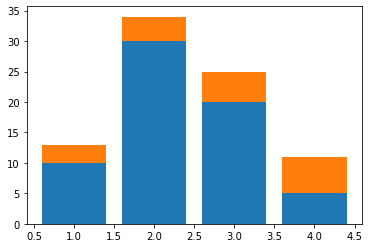

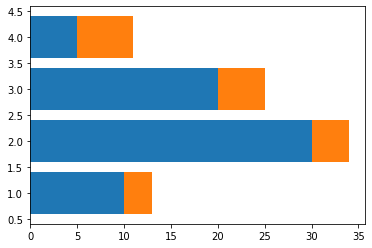

In [73]:
plt.bar([1,2,3,4], [10,30,20,5])
plt.bar([1,2,3,4], [3,4,5,6], bottom = [10,30,20,5])
plt.show()
plt.barh([1,2,3,4], [10,30,20,5])
plt.barh([1,2,3,4], [3,4,5,6], left = [10,30,20,5])
plt.show()

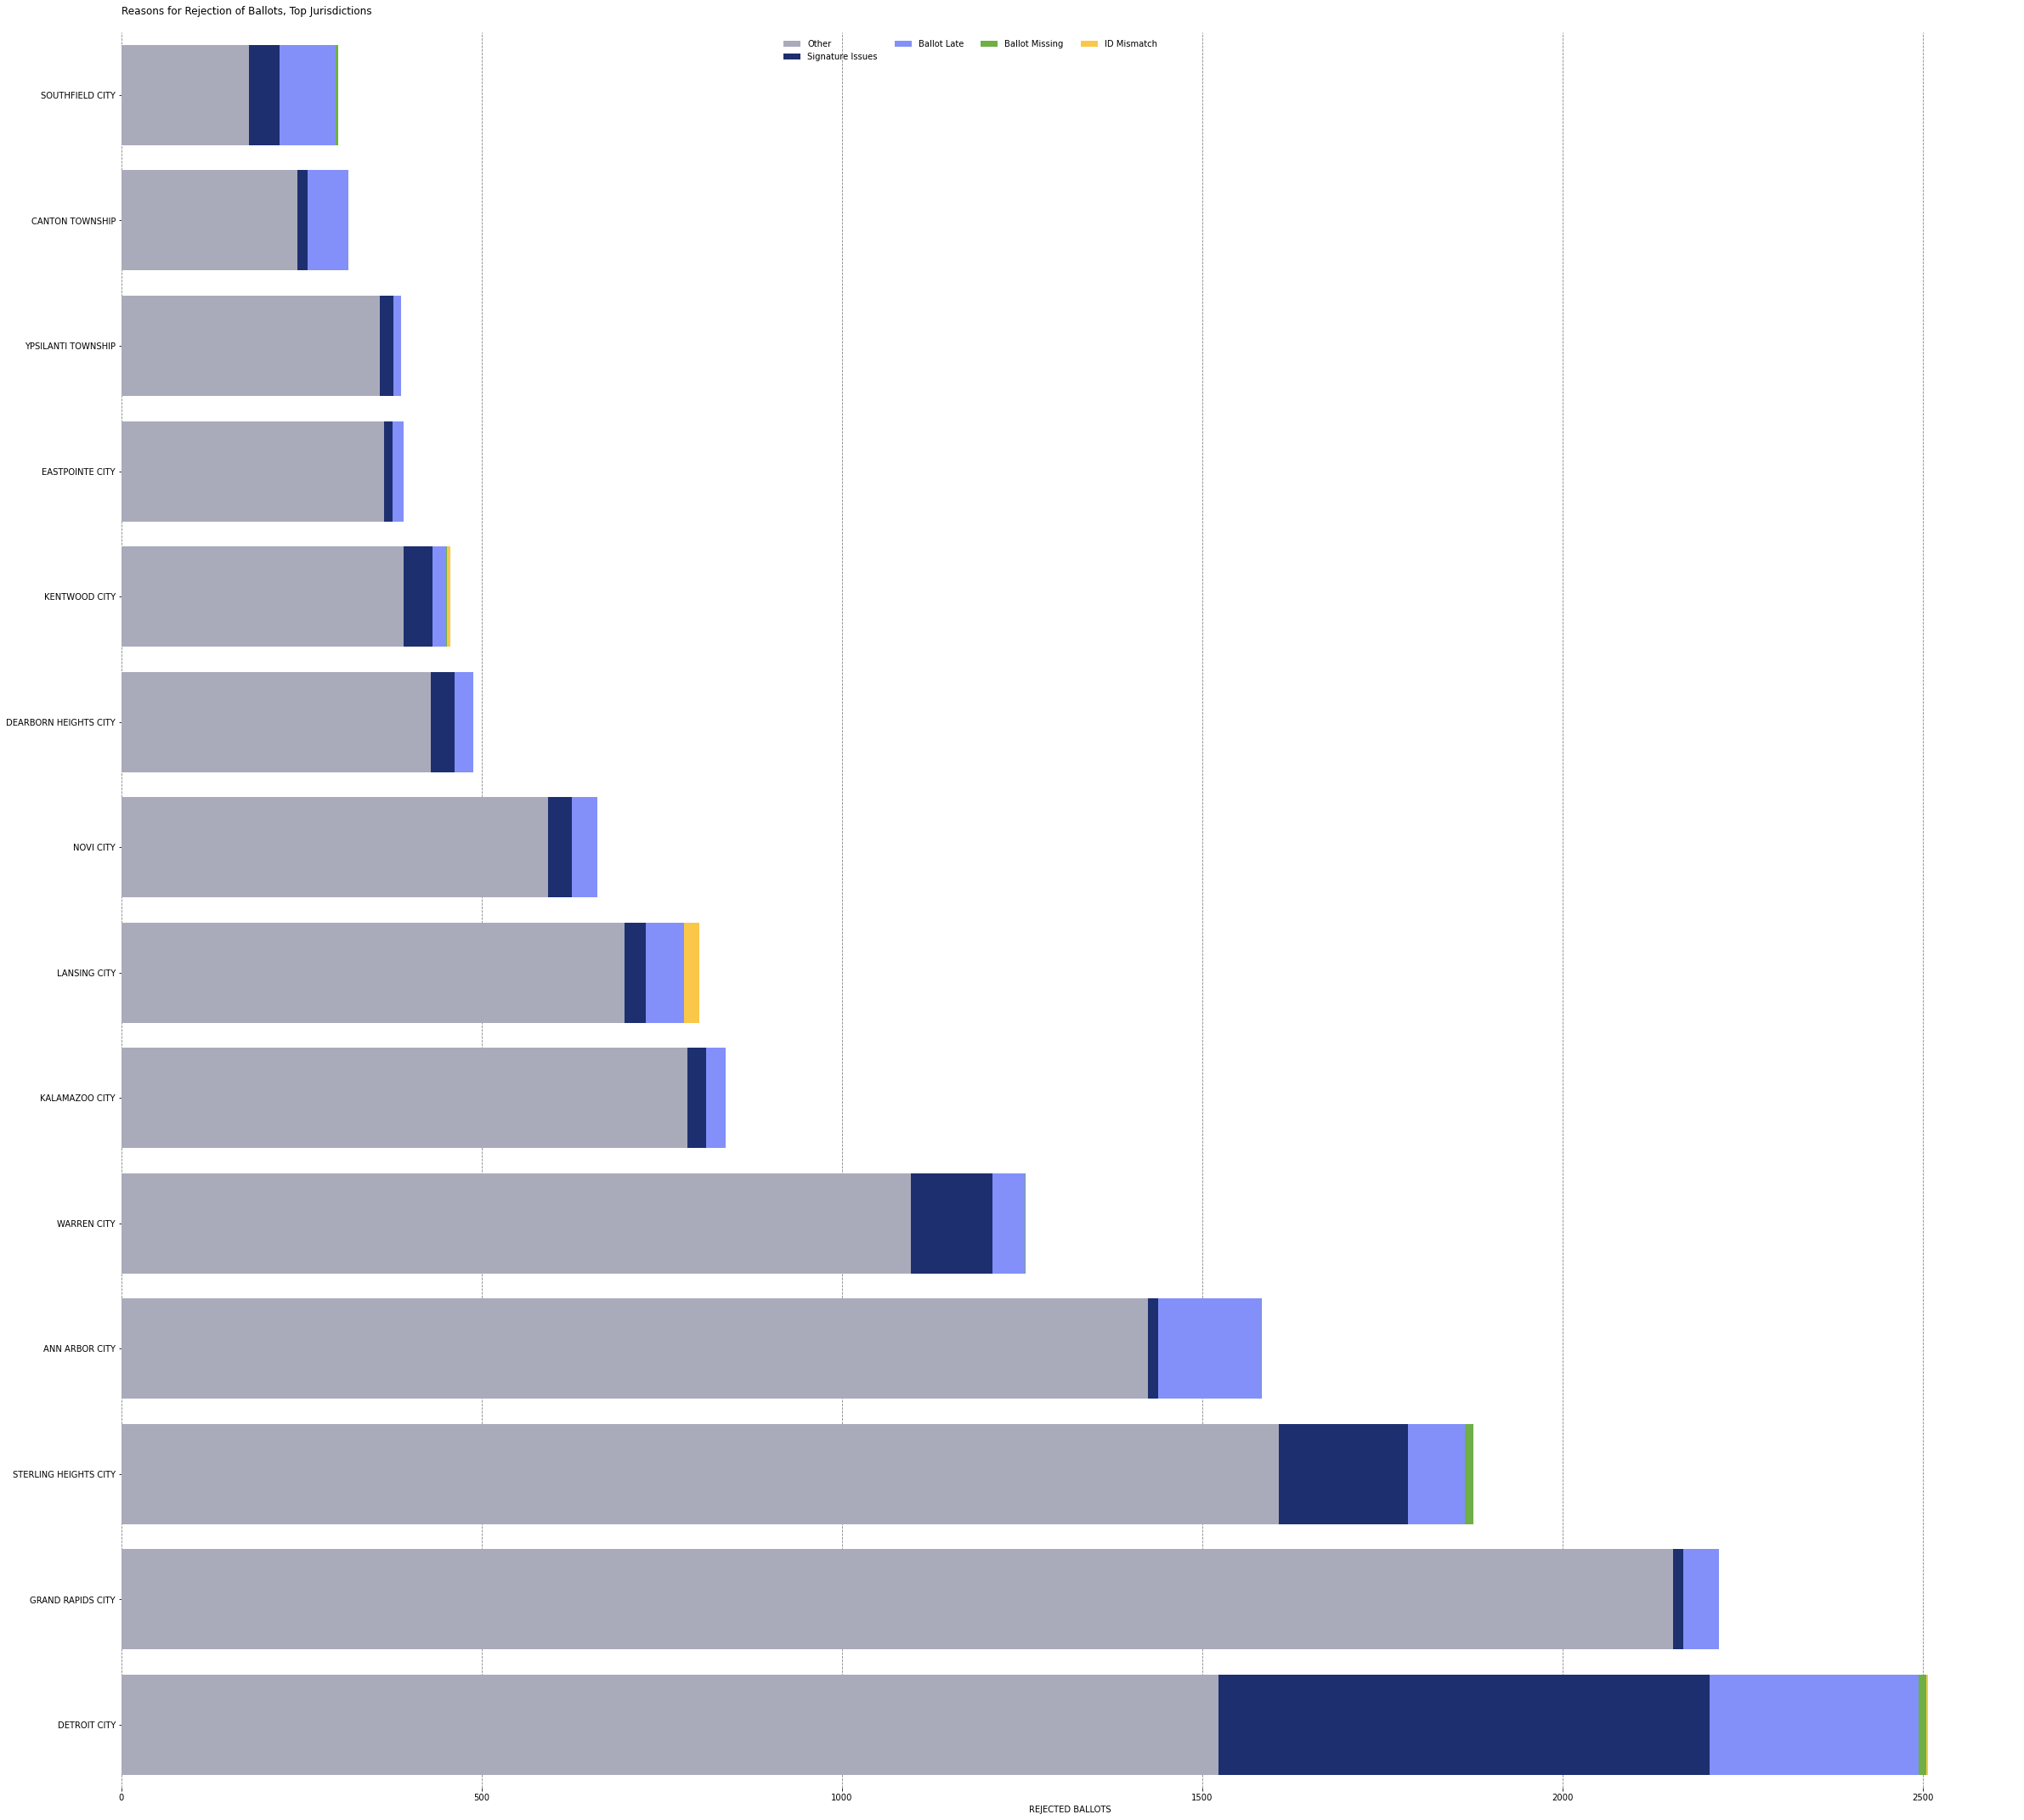

In [95]:
fields = ['OTHER','SIGNATURE ISSUES', 'BALLOT LATE','NO BALLOT IN ENVELOPE','ID NOT CONFIRMED']
colors = ['#A9ABBA','#1D2F6F', '#8390FA', '#6EAF46', '#FAC748']
labels = ['Other','Signature Issues','Ballot Late','Ballot Missing','ID Mismatch']

#figure and axis
fig, ax = plt.subplots(1, figsize=(40,38))
#plot bars
left = len(chart1) * [0]
for idx, name in enumerate(fields): 
    plt.barh(chart1.index, chart1[name], left=left, color=colors[idx])
    left = left + chart1[name]
#title, legend, labels
plt.title('Reasons for Rejection of Ballots, Top Jurisdictions\n', loc='left')
plt.legend(labels, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False)
plt.xlabel('REJECTED BALLOTS')
#remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')

plt.show()